In [51]:
import pandas as pd
# import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,HuberRegressor,Lasso
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split

import numpy as np
import pickle
%matplotlib inline

In [52]:
data_path='../raw_data/'
interdata_path='../interdata/'
model_path='../models/'

In [53]:
def custom_RMSLE(model,X,y_true):
    y_pred=model.predict(X)
    y_pred=y_pred.reshape(1,len(y_pred))[0]
    sum_term=sum([(np.log(y_pred[i]+1)-np.log(y_true[i]+1))**2 for i in range(len(y_true))])
    return np.sqrt(sum_term/float(len(y_true)))

In [54]:
def custom_RMSLE2(model,X,y_true0):
    y_pred0=model.predict(X)
    y_pred0=y_pred0.reshape(1,len(y_pred0))[0]
    Norm1=pickle.load(open(model_path+'norm1.sav', 'rb'))
    
    y_pred=Norm1.inverse_transform(y_pred0)
    y_true=Norm1.inverse_transform(y_true0)
    sum_term=sum([(np.log(y_pred[i]+1)-np.log(y_true[i]+1))**2 for i in range(len(y_true))])
    return np.sqrt(sum_term/float(len(y_true)))

### Data with transformation (RF)

In [40]:
dtr_transf=pd.read_csv(interdata_path+"data_train_transform_only.csv")

In [41]:
dtr_transf.head()

,722a0187a_logistic,1c71183bb,a5f8c7929_exp,05f11f48f_logistic,00b309c64_exp,09a65c3a5,38ec5d3bb_exp,17b81a716_quadratic,f66c58ca7_log10,ce53d1a35_logistic,...,b850c3e18_quadratic,bf0e69e55_logistic,7f91dc936,6a1ba30dc_log10,1a82869a6,1e16f11f3_logistic,61c1b7eb6_logistic,489dde24b_logistic,ID,target
0,0.5,600000.0,1.0,0.5,1.0,0,1.0,0.0,0.0,0.5,...,0.0,0.5,0,0.0,0.0,0.5,1.0,0.5,000d6aaf2,38000000.0
1,0.5,0.0,1.0,0.5,1.0,0,1.0,0.0,0.0,0.5,...,0.0,0.5,0,0.0,0.0,0.5,1.0,0.5,000fbd867,600000.0
2,0.5,0.0,1.0,0.5,1.0,0,1.0,0.0,0.0,0.5,...,0.0,0.5,0,0.0,0.0,0.5,0.5,0.5,0027d6b71,10000000.0
3,0.5,0.0,1.0,0.5,1.0,0,1.0,0.0,0.0,0.5,...,0.0,0.5,0,0.0,0.0,0.5,0.5,0.5,0028cbf45,2000000.0
4,0.5,0.0,1.0,0.5,1.0,0,1.0,0.0,0.0,0.5,...,0.0,0.5,0,0.0,0.0,0.5,0.5,0.5,002a68644,14400000.0


In [42]:
# dtr_transf["intrc"]=1

In [43]:
col_X=list(set(dtr_transf.columns)-set(["ID","target"]))

In [44]:
X1=dtr_transf[col_X].as_matrix()
y1=dtr_transf[["target"]].as_matrix()

In [45]:
X1_tr,X1_te,y1_tr,y1_te=train_test_split(X1,y1,test_size=0.2,random_state=211)

In [46]:
mod1=RandomForestRegressor()
# n_estimators=10, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1

In [11]:
cross_mod1=cross_val_score(mod1,X1_tr,y1_tr,cv=3,verbose=1,scoring=custom_RMSLE)

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.2min finished


In [12]:
cross_mod1

array([ 1.78167167,  1.84821171,  1.76241729])

In [47]:
mod1.fit(X1_tr,y1_tr)

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

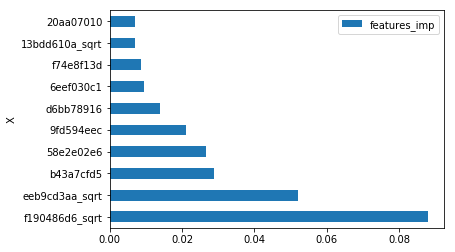

In [49]:
fi_1=pd.DataFrame({"X":col_X,"features_imp":mod1.feature_importances_})
fi_1=fi_1.sort_values("features_imp",ascending=False)
fi_1.index=fi_1.X
fi_1.head(10).plot(kind='barh')

In [50]:
fi_1.head(1000).index.tolist()

['f190486d6_sqrt',
 'eeb9cd3aa_sqrt',
 'b43a7cfd5',
 '58e2e02e6',
 '9fd594eec',
 'd6bb78916',
 '6eef030c1',
 'f74e8f13d',
 '13bdd610a_sqrt',
 '20aa07010',
 '9280f3d04',
 'db3839ab0',
 '15ace8c9f_sqrt',
 'd3022e2f1_quadratic',
 '58232a6fb',
 '4edc3388d',
 '1c71183bb',
 'fe919be32_quadratic',
 'ca25aad9f',
 '0824edecb_quadratic',
 '96b6bd42b',
 '491b9ee45',
 '4d2671746_sqrt',
 '00f844fea',
 '5f6ea2fa9_quadratic',
 'b9ba17eb6',
 'c1ad8b95a_quadratic',
 '2ec5b290f',
 '26fc93eb7',
 '73687e512',
 '1f71b76c1_sqrt',
 'fb49e4212',
 '024c577b9',
 'e43343256',
 '4e06e4849_quadratic',
 '5a1589f1a',
 'b4cfe861f_sqrt',
 '884ec1cca',
 'd9db07d68_ln',
 '57dd44c29_sqrt',
 '324921c7b',
 '041c5d0c9_sqrt',
 '899dbe405_quadratic',
 '66ace2992',
 '241f0f867',
 'ddea5dc65',
 '51ee03895_sqrt',
 '2fc60d4d9_sqrt',
 'f14b57b8f',
 'e13b0c0aa',
 '58e056e12',
 '36a131c2c_quadratic',
 '1702b5bf0',
 'fc99f9426',
 '2862eec4f_quadratic',
 'bf6e38e39_quadratic',
 'e078302ef_sqrt',
 '6b0722bfa_quadratic',
 'c5a231d81',
 

In [50]:
# save the model to disk
modsan_name1= model_path+'Model_San1.sav'
pickle.dump(mod1, open(modsan_name1, 'wb'))
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

### Data with transformation PCA (RF)

In [4]:
dtr_transfPCA=pd.read_csv(interdata_path+"data_train_transform_PCA1.csv")

In [5]:
dtr_transfPCA.head()

,pca_col_0,pca_col_1,pca_col_2,pca_col_3,pca_col_4,pca_col_5,pca_col_6,pca_col_7,pca_col_8,pca_col_9,...,pca_col_3544,pca_col_3545,pca_col_3546,pca_col_3547,pca_col_3548,pca_col_3549,pca_col_3550,pca_col_3551,ID,target
0,-8.959082e+13,-3.657993e+14,-7.824701e+13,-1.140064e+14,-7.610042e+12,-4.340431e+13,-1.629594e+14,-6.947703e+13,-5.781918e+13,-9.198672e+13,...,-0.002135,-0.009586,-0.026318,-0.025466,0.002656,0.040873,-0.046420,-0.000065,000d6aaf2,38000000.0
1,-8.956127e+13,-3.658393e+14,-7.826238e+13,-1.140259e+14,-7.618545e+12,-4.342704e+13,-1.630030e+14,-6.951986e+13,-5.784884e+13,-9.241282e+13,...,0.003328,-0.012693,-0.007876,0.018808,0.019926,-0.002182,0.007363,-0.001374,000fbd867,600000.0
2,-8.958910e+13,-3.657994e+14,-7.824748e+13,-1.140077e+14,-7.612261e+12,-4.340350e+13,-1.629533e+14,-6.947789e+13,-5.783108e+13,-9.234091e+13,...,-0.000331,-0.009591,-0.032700,0.005454,-0.003301,0.023273,0.011570,-0.012996,0027d6b71,10000000.0
3,-8.958897e+13,-3.658014e+14,-7.825021e+13,-1.140059e+14,-7.617721e+12,-4.340254e+13,-1.629530e+14,-6.947771e+13,-5.783022e+13,-9.234094e+13,...,-0.011286,-0.003275,-0.004172,0.008948,-0.019142,0.002685,0.028677,-0.007835,0028cbf45,2000000.0
4,-8.959706e+13,-3.658004e+14,-7.822764e+13,-1.140227e+14,-7.585937e+12,-4.338156e+13,-1.629740e+14,-6.951006e+13,-5.782306e+13,-9.236635e+13,...,0.020608,-0.009794,-0.007232,0.003920,-0.036155,-0.042775,0.016884,0.000139,002a68644,14400000.0


In [6]:
# dtr_transf["intrc"]=1

In [7]:
col_X=list(set(dtr_transfPCA.columns)-set(["ID","target"]))

In [8]:
X2=dtr_transfPCA[col_X].as_matrix()
y2=dtr_transfPCA[["target"]].as_matrix()

In [9]:
X2_tr,X2_te,y2_tr,y2_te=train_test_split(X2,y2,test_size=0.2,random_state=211)

In [18]:
mod1=RandomForestRegressor(n_estimators=15, max_depth=100, min_samples_split=10,
                min_samples_leaf=20)
mod2=RandomForestRegressor(n_estimators=20, max_depth=250, min_samples_split=20,
                min_samples_leaf=15)
# n_estimators=10, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1

In [19]:
cross_mod2_2=cross_val_score(mod2,X2_tr,y2_tr,cv=3,verbose=1,scoring=custom_RMSLE)

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.4min finished


In [17]:
cross_mod2, cross_mod2.mean()

(array([ 1.90746573,  1.96033796,  1.9730247 ,  1.85136087,  1.87583313]),
 1.913604476950858)

In [20]:
cross_mod2_2, cross_mod2_2.mean()

(array([ 1.91980685,  1.94983401,  1.89342422]), 1.9210216938704203)

In [25]:
mod1.fit(X2_tr,y2_tr)

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=20,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=15, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

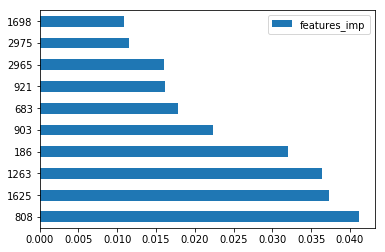

In [30]:
fi_2=pd.DataFrame({"X":col_X,"features_imp":mod1.feature_importances_})
fi_2=fi_2.sort_values("features_imp",ascending=False)
fi_2.head(10).plot(kind='barh')

### data_train_reduce_only (AdaBoost)

In [55]:
dtr3=pd.read_csv(interdata_path+"data_train_reduce_only.csv")

In [56]:
dtr3.shape

(4459, 1002)

In [57]:
dtr3.head()

,f190486d6,eeb9cd3aa,b43a7cfd5,58e2e02e6,9fd594eec,d6bb78916,6eef030c1,f74e8f13d,13bdd610a,20aa07010,...,2d6bd8275,586b23138,1e16f11f3,e5ddadc85,1847c8140,eb4a20186,d00757989,3e3ea106e,ID,target2
0,1866666.66,700000.0,0.0,12066666.66,600000.0,0.0,900000.0,1733333.34,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,000d6aaf2,3.893303
1,0.00,2225000.0,0.0,2850000.00,1800000.0,2000000.0,800000.0,0.00,0.0,2200000.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,000fbd867,-0.649177
2,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0027d6b71,0.492516
3,2000000.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,0028cbf45,-0.479137
4,0.00,0.0,0.0,0.00,0.0,0.0,37662000.0,0.00,0.0,2000000.0,...,0.0,0.0,0.0,0.0,0,0.0,0,0,002a68644,1.026926


In [58]:
col_met3=list(set(dtr3.columns)-set(["ID",'target2']))

In [59]:
X3=dtr3[col_met3].as_matrix()
y3=dtr3[["target2"]].as_matrix()

In [60]:
X3_tr,X3_te,y3_tr,y3_te=train_test_split(X3,y3,test_size=0.2,random_state=110)

In [61]:
mod1=RandomForestRegressor(n_estimators=30, max_depth=300, min_samples_split=20,
                min_samples_leaf=10)
mod_adab1=AdaBoostRegressor(base_estimator=mod1, n_estimators=500, learning_rate=0.75)

In [62]:
Norm1=pickle.load(open(model_path+'norm1.sav', 'rb'))

In [63]:
cross_mod2_2=cross_val_score(mod_adab1,X3_tr,y3_tr,cv=3,verbose=1,scoring=custom_RMSLE2)

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 174.0min finished


In [64]:
cross_mod2_2

array([ 2.27963214,  1.95569087,  2.04517727])

In [20]:
mod_adab1.fit(X3_tr,y3_tr)

C:\Users\Aska\Anaconda2\envs\snakes3_gpu\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=20,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=15, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
         learning_rate=0.8, loss='linear', n_estimators=150,
         random_state=None)

In [21]:
# save the model to disk
modsan_name2= model_path+'Model_San2.sav'
pickle.dump(mod_adab1, open(modsan_name2, 'wb'))


### Bayesian Opt

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
def RF_reg_eval(n_estimators, max_depth, min_samples_split,
                min_samples_leaf,X=X_tr,y=t_tr):
    
    n_estimators=int(n_estimators)
    max_depth=int(max_depth)
    min_samples_split=int(min_samples_split)
    min_samples_leaf=int(min_samples_leaf)
    
# n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=1

In [ ]:
RFBO=BayesianOptimization(RF_reg_eval,{})

In [ ]:
RFBO.maximize(init_points=7,n_iter=5)